In [4]:

%matplotlib inline
import pandas as pd 

In [3]:
titles = pd.read_csv('C:/Users/USER/Desktop/day1_python/day_10_exercises/titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [9]:
cast=pd.read_csv('cast.csv',index_col= None)
cast

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# 1.Using groupby(), plot the number of films that have been released each decade in the history of cinema.


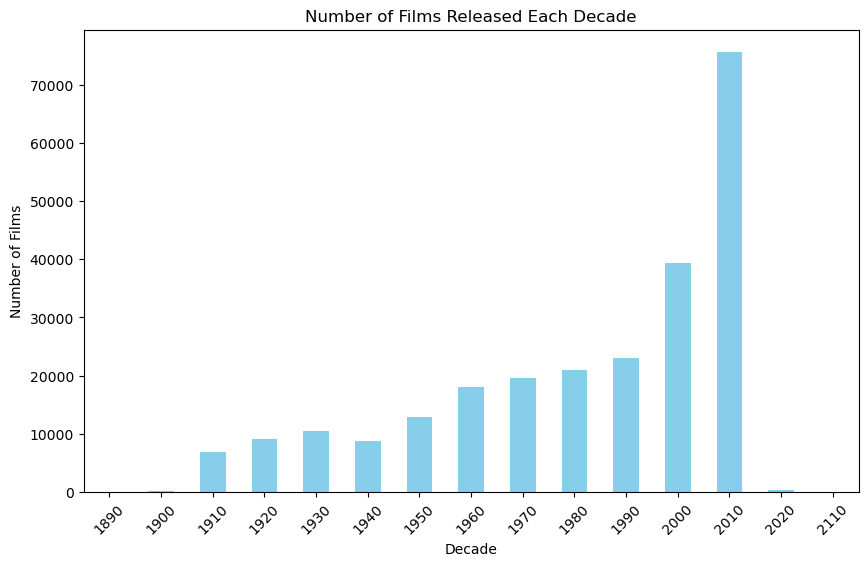

In [10]:
import matplotlib.pyplot as plt

titles['decade'] = titles['year'] // 10 * 10

decade_counts = titles.groupby('decade').size()
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()


# 2.use groupby() to plot the number of "Hamlet" films made each decade.How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s

In [13]:
cast=pd.read_csv('cast.csv',index_col= None)
cast

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


C:\Users\USER\AppData\Local\Temp\ipykernel_13732\3559542818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_df['decade'] = hamlet_df['year'] // 10 * 10


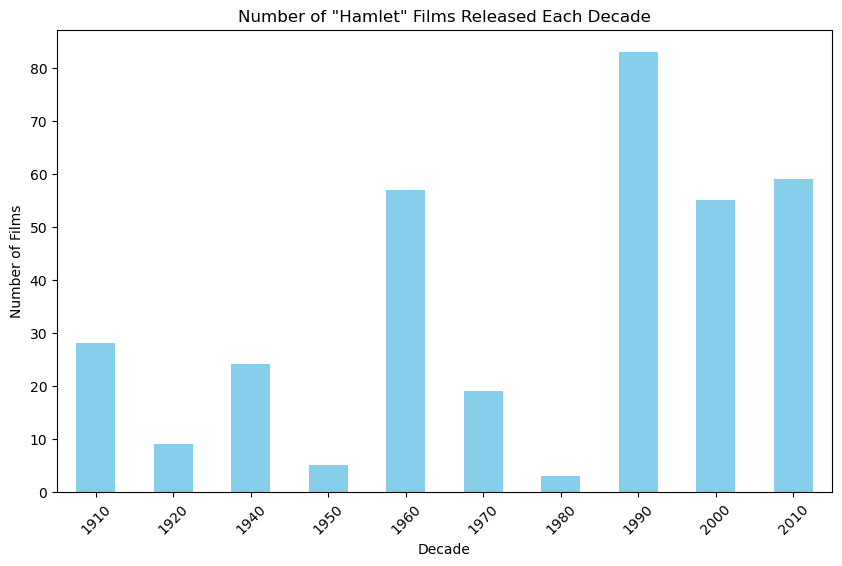

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
Name: n, dtype: int64


In [27]:
import matplotlib.pyplot as plt

hamlet_df = cast[cast['title'] == 'Hamlet']

hamlet_df['decade'] = hamlet_df['year'] // 10 * 10

hamlet_decade_counts = hamlet_df.groupby('decade').size()

plt.figure(figsize=(10, 6))
hamlet_decade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of "Hamlet" Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

movies_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

roles_1950s = movies_1950s[movies_1950s['n'] == 1].groupby(['year', 'type'])['n'].count()

print(roles_1950s)


# 3.How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?


In [19]:

movies_1950s =cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

leading_roles_1950s = movies_1950s[movies_1950s['n'] == 1].groupby(['year', 'type'])['n'].count().unstack(fill_value=0)

print(leading_roles_1950s)


type  actor  actress
year                
1950    625      288
1951    651      285
1952    613      304
1953    664      312
1954    636      316
1955    648      285
1956    668      307
1957    739      315
1958    715      301
1959    733      327


# 4.in the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?


In [23]:
# Filter the DataFrame for movies from the 1950s
movies_1950s =cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Group and count roles for actors and actresses in the 1950s by "n" number
roles_by_n_1950s = movies_1950s.groupby(['type', 'n'])['n'].count().unstack(fill_value=0)

# Print the result
print(roles_by_n_1950s)


n        1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0   \
type                                                                            
actor     6692   4640   5654   5663   5674   5591   5532   5302   4906   4466   
actress   3040   4635   3201   2881   2592   2384   2069   1853   1680   1523   

n        ...  157.0  158.0  159.0  160.0  161.0  162.0  163.0  164.0  418.0  \
type     ...                                                                  
actor    ...      0      0      0      0      0      0      0      0      0   
actress  ...      1      1      1      1      1      1      1      1      1   

n        788.0  
type            
actor        0  
actress      1  

[2 rows x 166 columns]


# 5.Use groupby() to determine how many roles are listed for each of the Pink Panther movies.


In [24]:
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False)]

roles_in_pink_panther_movies = pink_panther_movies.groupby('title')['n'].count()

# Print the result
print(roles_in_pink_panther_movies)


title
Curse of the Pink Panther         63
Revenge of the Pink Panther       57
Son of the Pink Panther           43
The Pink Panther                  66
The Pink Panther 2                36
The Pink Panther Strikes Again    61
The Return of the Pink Panther    27
Trail of the Pink Panther         32
Name: n, dtype: int64


# 6.List, in order by year, each of the films in which Frank Oz has played more than 1 role.


In [26]:
frank_oz_movies = cast[cast['name'] == 'Frank Oz']

roles_in_movies = frank_oz_movies.groupby(['title', 'year'])['n'].count().reset_index()

multiple_roles_movies = roles_in_movies[roles_in_movies['n'] > 1]

sorted_movies = multiple_roles_movies.sort_values(by='year')

print(sorted_movies)


                                   title  year  n
24                      The Muppet Movie  1979  8
0         An American Werewolf in London  1981  2
22                The Great Muppet Caper  1981  6
20                      The Dark Crystal  1982  2
25            The Muppets Take Manhattan  1984  7
2                       Follow That Bird  1985  3
23            The Muppet Christmas Carol  1992  7
7                 Muppet Treasure Island  1996  4
8                     Muppets from Space  1999  4
18  The Adventures of Elmo in Grouchland  1999  3


# 7.list each of characters that frank oz has portrayef at least twice.

In [28]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

character_counts = frank_oz_roles.groupby('character').size()

characters_at_least_twice = character_counts[character_counts >= 2]

print(characters_at_least_twice)


character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64
